## COVID DATA

In [1]:
#IMPORTS
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
# IMPORT DATA
data = pd.read_csv("C:\\Users\\siddh\\OneDrive\\Desktop\\Data science data\\Time series\\covid_19_clean_complete.csv")
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
## CHECKING FOR NULL VALUES
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:
#INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
## CONVERTING DATE TO DATETIME FORMAT
data['Date'] = pd.to_datetime(data['Date'])

## Durbin Watson test for Autocorrelation

In [6]:
import statsmodels.api as sm


In [7]:
# CONFIRMED 
sm.stats.durbin_watson(data['Confirmed'])

1.9582652252691064

In [8]:
# DEATHS
sm.stats.durbin_watson(data['Deaths'])

1.9783752272041735

In [9]:
# RECOVERED
sm.stats.durbin_watson(data['Recovered'])

1.9275412897470758

In [10]:
# ACTIVE
sm.stats.durbin_watson(data['Active'])

1.9827116482632792

In [11]:
# data statistics
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [12]:
# Number of unique dates
data['Date'].nunique()

188

In [13]:
# GROUPING DATA DATE-WISE AND TOTAL CASES
new_data = data.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [14]:
new_data

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [15]:
# IMPORTING FACEBOOK PROPHET MODEL
#!pip install -v --only-binary pystan pystan pymeeus
#!python -m pip install prophet

In [16]:
import prophet

In [17]:
#FUNCTIONALITIES IN PROPHET
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'hdays',
 'here',
 'make_holidays',
 'models',
 'plot']

In [18]:
# RENAMING DEPENDENT VARIABLE TO y AND INDEPENDENT VARIABLE i.e. ds
df_prophet = new_data.rename(columns={'Date':'ds','Confirmed':'y'})

In [19]:
# IMPORTING Prophet Package
from prophet import Prophet

In [21]:
# OBJECT INSTANTIATION
m = Prophet()

In [22]:
# FITTING DATA 
model = m.fit(df_prophet)

09:30:15 - cmdstanpy - INFO - Chain [1] start processing
09:30:15 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# MODEL SEASONALITY
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [24]:
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [26]:
# ADDING 100 FUTURE DAYS 
future_pred = model.make_future_dataframe(periods=100,freq='D')

In [27]:
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03


In [29]:
# PREDICTIONS
prediction = model.predict(future_pred)

In [30]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.445493e+03,-1.321969e+05,7.852757e+04,-9.445493e+03,-9.445493e+03,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,0.0,0.0,0.0,-2.044339e+04
1,2020-01-23,-6.740790e+03,-1.113586e+05,9.264887e+04,-6.740790e+03,-6.740790e+03,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,0.0,0.0,0.0,-7.841899e+03
2,2020-01-24,-4.036087e+03,-1.005844e+05,1.133390e+05,-4.036087e+03,-4.036087e+03,10060.657719,10060.657719,10060.657719,10060.657719,10060.657719,10060.657719,0.0,0.0,0.0,6.024571e+03
3,2020-01-25,-1.331384e+03,-8.968274e+04,1.297445e+05,-1.331384e+03,-1.331384e+03,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,0.0,0.0,0.0,1.240772e+04
4,2020-01-26,1.373319e+03,-9.802614e+04,1.179936e+05,1.373319e+03,1.373319e+03,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,0.0,0.0,0.0,8.645679e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-10-31,3.571807e+07,3.305353e+07,3.861083e+07,3.304015e+07,3.860484e+07,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,0.0,0.0,0.0,3.573181e+07
284,2020-11-01,3.592208e+07,3.317982e+07,3.889680e+07,3.319819e+07,3.885749e+07,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,0.0,0.0,0.0,3.592935e+07
285,2020-11-02,3.612609e+07,3.333785e+07,3.910979e+07,3.336746e+07,3.912342e+07,-2109.410773,-2109.410773,-2109.410773,-2109.410773,-2109.410773,-2109.410773,0.0,0.0,0.0,3.612398e+07
286,2020-11-03,3.633010e+07,3.355857e+07,3.938093e+07,3.354329e+07,3.940165e+07,-16863.703632,-16863.703632,-16863.703632,-16863.703632,-16863.703632,-16863.703632,0.0,0.0,0.0,3.631324e+07


In [34]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2020-10-31,3.573181e+07,3.305353e+07,3.861083e+07
284,2020-11-01,3.592935e+07,3.317982e+07,3.889680e+07
285,2020-11-02,3.612398e+07,3.333785e+07,3.910979e+07
286,2020-11-03,3.631324e+07,3.355857e+07,3.938093e+07
287,2020-11-04,3.652312e+07,3.368591e+07,3.962511e+07


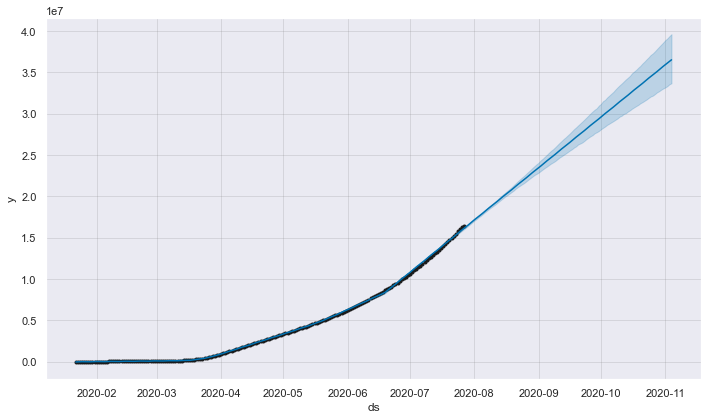

In [35]:
# MODEL PLOT
model.plot(prediction)
plt.show()

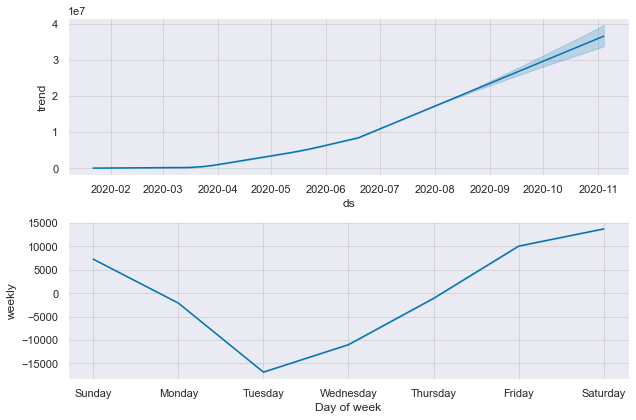

In [37]:
# WEEKDAY WISE PLOT
model.plot_components(prediction)
plt.show()

In [38]:
# EVALUATING PERFORMANCE OF MODEL
from prophet.diagnostics import cross_validation

In [39]:
df_cv = cross_validation(model,horizon="30 days",period = "15 days",initial="90 days")

  0%|          | 0/5 [00:00<?, ?it/s]

09:46:30 - cmdstanpy - INFO - Chain [1] start processing
09:46:31 - cmdstanpy - INFO - Chain [1] done processing
09:46:31 - cmdstanpy - INFO - Chain [1] start processing
09:46:31 - cmdstanpy - INFO - Chain [1] done processing
09:46:32 - cmdstanpy - INFO - Chain [1] start processing
09:46:32 - cmdstanpy - INFO - Chain [1] done processing
09:46:32 - cmdstanpy - INFO - Chain [1] start processing
09:46:33 - cmdstanpy - INFO - Chain [1] done processing
09:46:33 - cmdstanpy - INFO - Chain [1] start processing
09:46:33 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196229e+06,3.206383e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.278610e+06,3.291785e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.359758e+06,3.378093e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.436824e+06,3.462714e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.511880e+06,3.547580e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315245e+07,1.290073e+07,1.339433e+07,15510481,2020-06-27
146,2020-07-24,1.329193e+07,1.303226e+07,1.354025e+07,15791645,2020-06-27
147,2020-07-25,1.342827e+07,1.314824e+07,1.369923e+07,16047190,2020-06-27
148,2020-07-26,1.354703e+07,1.324573e+07,1.383188e+07,16251796,2020-06-27


In [41]:
from prophet.diagnostics import performance_metrics

In [42]:
df_per = performance_metrics(df_cv)

In [43]:
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.714808e+10,1.647667e+05,1.290616e+05,0.016856,0.017600,0.017039,0.000000
1,4 days,3.761718e+10,1.939515e+05,1.512328e+05,0.019317,0.022389,0.019562,0.066667
2,5 days,5.159644e+10,2.271485e+05,1.750532e+05,0.021766,0.025749,0.022085,0.133333
3,6 days,6.924995e+10,2.631538e+05,2.020240e+05,0.024543,0.026747,0.024954,0.200000
4,7 days,8.998205e+10,2.999701e+05,2.323610e+05,0.027825,0.031309,0.028348,0.200000
5,8 days,1.143951e+11,3.382235e+05,2.641976e+05,0.031132,0.034969,0.031790,0.200000
6,9 days,1.399463e+11,3.740940e+05,2.954883e+05,0.034317,0.038861,0.035119,0.200000
7,10 days,1.686206e+11,4.106344e+05,3.261934e+05,0.037359,0.043968,0.038310,0.200000
8,11 days,2.010658e+11,4.484036e+05,3.571724e+05,0.040351,0.048816,0.041453,0.200000
9,12 days,2.435972e+11,4.935557e+05,3.924588e+05,0.043529,0.052135,0.044811,0.200000


In [44]:
# VISUALIZING ERROR
from prophet.plot import plot_cross_validation_metric

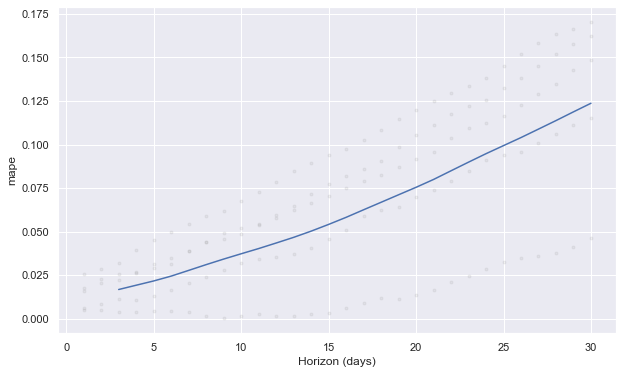

In [45]:
df_performance = plot_cross_validation_metric(df_cv,metric='mape')